In [18]:
import importlib
import theano.tensor as T
import sys, os
sys.path.append("/home/bl3/PycharmProjects/GeMpy/GeMpy")
sys.path.append("/home/bl3/PycharmProjects/GeMpy/pygeomod/pygeomod")
sys.path.append("/home/miguel/PycharmProjects/GeMpy/GeMpy")
import GeoMig
#import geogrid
#importlib.reload(GeoMig)
importlib.reload(GeoMig)
import pandas as pn

import numpy as np
%matplotlib inline
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 4, linewidth= 300, suppress =  True)
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [19]:
# Setting extend, grid and compile
# Setting the extent
test = GeoMig.Interpolator(0,10,0,10,0,10,
                                range_var = np.float32(17),
                               u_grade = 9) # Range used in geomodeller

# Setting resolution of the grid
test.set_resolutions(40,40,60)
test.create_regular_grid_3D()

# Compiling
test.theano_compilation_3D()
#test.theano_set_3D_nugget_degree0()

/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


In [20]:
layer_1 = np.array([[0.5,4,7], [2,4,6], [4,4,7], [5,4,5], [8,4,7], [7,4,8], [1,5,7]])#-np.array([5,5,4]))/8+0.5
layer_2 = np.array([[3,5,5], [6,5,4]])
layer_3 = np.array([[1,5,1],[1,5,2],[6,5,3]])#- np.array([5,5,4]))/8+0.5

dip_pos_1 = np.array([5,5,7])#- np.array([5,5,4]))/8+0.5
dip_pos_2 = np.array([7.,5,2])
dip_pos_3 = np.array([8,4,5])
dip_angle_1 = float(15)
dip_angle_2 = float(230)


layers = np.asarray([layer_1,layer_2])#,np.array([[2,5,11],[3,1,2],[6,2,1]])])
test.layers = np.asarray([layer_1,layer_2])
dips = np.asarray([dip_pos_1, dip_pos_2])#, dip_pos_3])
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float64")
azimuths = np.asarray([90,90], dtype="float64")
polarity = np.asarray([1,1], dtype="float64")
#print (dips_angles)
np.append(np.tile("Layer_1", len(layer_1)), np.tile("Layer_2", len(layer_2)))
np.append(np.tile("Layer_1", len(dip_pos_1)), np.tile("Layer_2", len(dip_pos_2)))

array(['Layer_1', 'Layer_1', 'Layer_1', 'Layer_2', 'Layer_2', 'Layer_2'], 
      dtype='<U7')

In [21]:
test.Interfaces = pn.DataFrame(data = {"X" :np.append(layer_1[:, 0],layer_2[:,0]),
                                      "Y" :np.append(layer_1[:, 1],layer_2[:,1]),
                                      "Z" :np.append(layer_1[:, 2],layer_2[:,2]),
"formation" : np.append(np.tile("Layer_1", len(layer_1)), np.tile("Layer_2", len(layer_2)))})
test.Foliations =   pn.DataFrame(data = {"X" :np.append(dip_pos_1[0],dip_pos_2[0]),
                                          "Y" :np.append(dip_pos_1[ 1],dip_pos_2[1]),
                                          "Z" :np.append(dip_pos_1[ 2],dip_pos_2[2]),
                                         "azimuth" : azimuths,
                                         "dip" : dips_angles,
                                         "polarity" : polarity,
"formation" : ["Layer_1", "Layer_2"]})
test.Foliations, test.Interfaces
test.formations = test.Interfaces["formation"].unique()
test.set_series()
test.Interfaces

,X,Y,Z,formation
0,0.5,4.0,7.0,Layer_1
1,2.0,4.0,6.0,Layer_1
2,4.0,4.0,7.0,Layer_1
3,5.0,4.0,5.0,Layer_1
4,8.0,4.0,7.0,Layer_1
5,7.0,4.0,8.0,Layer_1
6,1.0,5.0,7.0,Layer_1
7,3.0,5.0,5.0,Layer_2
8,6.0,5.0,4.0,Layer_2


In [22]:
len(test.grid[:,0])/3

32000.0

In [23]:
test.compute_potential_field( verbose=1)
test.plot_potential_field_2D(direction = "y", cell_pos = 12, figsize=(7,6), contour_lines = 100)

The serie formations are Layer_1|Layer_2


ValueError: object too deep for desired array

In [58]:
%debug

> /home/bl3/anaconda3/lib/python3.5/site-packages/theano/compile/function_module.py(871)__call__()
    869                     node=self.fn.nodes[self.fn.position_of_error],
    870                     thunk=thunk,
--> 871                     storage_map=getattr(self.fn, 'storage_map', None))
    872             else:
    873                 # old-style linkers raise their own exceptions

ipdb> u
> /home/bl3/PycharmProjects/GeMpy/GeMpy/GeoMig.py(295)_aux_computations_potential_field()
    293         self.Z_x, self.G_x, self.G_y, self.G_z, self.potential_interfaces, self.C, self.DK = self.interpolate(
    294             self.dips_position, self.dip_angles, self.azimuth, self.polarity,
--> 295             rest_layer_points, ref_layer_points)[:]
    296 
    297         self.potential_field = self.Z_x.reshape(self.nx, self.ny, self.nz)

ipdb> yet_simulated
*** NameError: name 'yet_simulated' is not defined
ipdb> yet_simulated
*** NameError: name 'yet_simulated' is not define

In [37]:

# Reset the block
test.block.set_value(np.zeros_like(test.grid[:,0]))

# Compute the block
test.compute_block_model([0], verbose = 2)

[1 2]
[1 1 1 ..., 1 1 1] 0
The serie formations are Layer_1|Layer_2
The formations are: 
Layers       X    Y    Z formation
0  0.5  4.0  7.0   Layer_1
1  2.0  4.0  6.0   Layer_1
2  4.0  4.0  7.0   Layer_1
3  5.0  4.0  5.0   Layer_1
4  8.0  4.0  7.0   Layer_1
5  7.0  4.0  8.0   Layer_1
6  1.0  5.0  7.0   Layer_1
7  3.0  5.0  5.0   Layer_2
8  6.0  5.0  4.0   Layer_2  
 Foliations       X    Y    Z  azimuth    dip formation  polarity
0  5.0  5.0  7.0     90.0   15.0   Layer_1       1.0
1  7.0  5.0  2.0     90.0  230.0   Layer_2       1.0


ValueError: Input dimension mis-match. (input[0].shape[1] = 62407, input[2].shape[1] = 61887)
Apply node that caused the error: Elemwise{Mul}[(0, 1)](Subtensor{int64::}.0, InplaceDimShuffle{1,0}.0, Subtensor{:int64:}.0)
Toposort index: 338
Inputs types: [TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix)]
Inputs shapes: [(9, 62407), (9, 62407), (9, 61887)]
Inputs strides: [(8, 176), (8, 72), (495096, 8)]
Inputs values: ['not shown', 'not shown', 'not shown']
Outputs clients: [[Sum{axis=[0], acc_dtype=float64}(Elemwise{Mul}[(0, 1)].0)]]

Debugprint of the apply node: 
Elemwise{Mul}[(0, 1)] [id A] <TensorType(float64, matrix)> ''   
 |Subtensor{int64::} [id B] <TensorType(float64, matrix)> ''   
 | |InplaceDimShuffle{1,0} [id C] <TensorType(float64, matrix)> ''   
 | | |Reshape{2} [id D] <TensorType(float64, matrix)> ''   
 | |   |InplaceDimShuffle{0,2,1,3} [id E] <TensorType(float64, (False, True, True, False))> ''   
 | |   | |Alloc [id F] <TensorType(float64, (False, True, True, False))> ''   
 | |   |   |CGemv{inplace} [id G] <TensorType(float64, vector)> ''   
 | |   |   | |AllocEmpty{dtype='float64'} [id H] <TensorType(float64, vector)> ''   
 | |   |   | | |Elemwise{add,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | |   |   | |   |<TensorType(int64, scalar)> [id J] <TensorType(int64, scalar)>
 | |   |   | |   |Elemwise{mul,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | |   |   | |   | |TensorConstant{3} [id L] <TensorType(int64, scalar)>
 | |   |   | |   | |Shape_i{0} [id M] <TensorType(int64, scalar)> ''   
 | |   |   | |   |   |Position of the dips [id N] <TensorType(float64, matrix)>
 | |   |   | |   |Shape_i{0} [id O] <TensorType(int64, scalar)> ''   
 | |   |   | |     |Rest of the points of the layers [id P] <TensorType(float64, matrix)>
 | |   |   | |TensorConstant{1.0} [id Q] <TensorType(float64, scalar)>
 | |   |   | |MatrixInverse [id R] <TensorType(float64, matrix)> ''   
 | |   |   | | |IncSubtensor{InplaceSet;int64::, int64:int64:} [id S] <TensorType(float64, matrix)> ''   
 | |   |   | |   |IncSubtensor{InplaceSet;int64::, int64:int64:} [id T] <TensorType(float64, matrix)> ''   
 | |   |   | |   | |IncSubtensor{InplaceSet;int64:int64:, int64::} [id U] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | |IncSubtensor{InplaceSet;int64:int64:, int64:int64:} [id V] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | |IncSubtensor{InplaceSet;int64:int64:, int64:int64:} [id W] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | |IncSubtensor{InplaceSet;int64:int64:, int64::} [id X] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64:int64:} [id Y] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64:int64:} [id Z] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | |Alloc [id BA] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | |TensorConstant{0.0} [id BB] <TensorType(float64, scalar)>
 | |   |   | |   | | | | | | | | |Elemwise{add,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | |Elemwise{add,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | |FillDiagonal [id BC] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | |Elemwise{Composite{Switch(EQ(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2), i3), i3, ((((i4 * i5) / sqr(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2))) * ((i6 * LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2), i7) * i8 * Composite{(((i0 + ((i1 * i2) / i3)) - ((i4 * i5) / i6)) + ((i7 * i8) / i9))}(i9, i10, Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2), i11, i12, Composite{(sqr(i0) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2)), i13, i14, Composite{(sqr(sqr(i0)) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2)), i15)) + ((i16 * LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2), i7) * i8 * ((((i17 * Composite{(sqr(sqr(i0)) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2))) - (i18 * i19 * Composite{(sqr(i0) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2)))) + (i20 * i21 * Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2))) - i22)) / i15))) - (Composite{(((i0 + ((i1 * i2) / i3)) - ((i4 * i5) / i6)) + ((i7 * i8) / i9))}(i9, i10, Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2), i11, i12, Composite{(sqr(i0) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2)), i13, i14, Composite{(sqr(sqr(i0)) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2)), i15) * i8 * i23 * LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i0, i1, i2), i7))))}}[(0, 2)] [id BD] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | |Reshape{2} [id BE] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | | | | | |Sum{axis=[1], acc_dtype=float64} [id BF] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | |Elemwise{Sqr}[(0, 0)] [id BG] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | |   |Reshape{2} [id BH] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | |     |InplaceDimShuffle{0,2,1,3} [id BI] <TensorType(float64, (False, False, True, False))> ''   
 | |   |   | |   | | | | | | | | | | |     | |Alloc [id BJ] <TensorType(float64, (False, True, False, False))> ''   
 | |   |   | |   | | | | | | | | | | |     |   |Position of the dips [id N] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | | | | | |     |   |TensorConstant{3} [id BK] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | |     |   |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | |     |   |Shape_i{0} [id M] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | |     |   |Shape_i{1} [id BM] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | |     |     |Position of the dips [id N] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | | | | | |     |MakeVector{dtype='int64'} [id BN] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | | | | | |       |Elemwise{mul,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | |       |Shape_i{1} [id BM] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | |MakeVector{dtype='int64'} [id BO] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | | | | |   |Elemwise{Composite{Switch(EQ(i0, i1), ((i2 * i3 * i4) // (i5 * i3 * i4)), i0)}}[(0, 4)] [id BP] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | |   | |Elemwise{mul,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | |   | |TensorConstant{-1} [id BQ] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | |   | |TensorConstant{3} [id L] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | | | | |   | |Shape_i{0} [id M] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | |   | |Shape_i{1} [id BM] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | |   | |TensorConstant{-3} [id BR] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | | | | |   |TensorConstant{1} [id BS] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | | | | |Reshape{2} [id BT] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | | | | | |Sum{axis=[1], acc_dtype=float64} [id BF] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | |MakeVector{dtype='int64'} [id BU] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | | | | |   |TensorConstant{1} [id BS] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | | | | |   |Elemwise{Composite{Switch(EQ(i0, i1), ((i2 * i3 * i4) // (i5 * i3 * i4)), i0)}}[(0, 4)] [id BP] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | |Dot22Scalar [id BV] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | |Reshape{2} [id BH] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | |InplaceDimShuffle{1,0} [id BW] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | |Reshape{2} [id BH] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | |TensorConstant{2.0} [id BX] <TensorType(float64, scalar)>
 | |   |   | |   | | | | | | | | | |TensorConstant{(1, 1) of 0} [id BY] <TensorType(int8, (True, True))>
 | |   |   | |   | | | | | | | | | |Join [id BZ] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | |TensorConstant{0} [id CA] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | |Reshape{2} [id CB] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | |InplaceDimShuffle{0,2,1,3} [id CC] <TensorType(float64, (True, False, False, False))> ''   
 | |   |   | |   | | | | | | | | | | | | |Alloc [id CD] <TensorType(float64, (True, False, False, False))> ''   
 | |   |   | |   | | | | | | | | | | | |   |Elemwise{sub,no_inplace} [id CE] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | |   | |InplaceDimShuffle{x,0} [id CF] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | | | | | | |   | | |Subtensor{::, int64} [id CG] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | |   | |   |Position of the dips [id N] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | | | | | | |   | |   |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | | | | | | | | |   | |Reshape{2} [id CI] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | | | | | | |   |   |Subtensor{::, int64} [id CG] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | |   |   |MakeVector{dtype='int64'} [id CJ] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | |   |     |Shape_i{0} [id M] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | | |   |     |TensorConstant{1} [id BS] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | | | | | | |   |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | | |   |TensorConstant{3} [id BK] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | | |   |Elemwise{Composite{Switch(EQ(i0, i1), (i0 // (-i0)), i0)}} [id CK] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | | |   | |Shape_i{0} [id M] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | | |   | |TensorConstant{-1} [id BQ] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | | |   |Shape_i{0} [id M] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | | |MakeVector{dtype='int64'} [id CL] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | | | | | |   |Elemwise{Composite{Switch(EQ(i0, i1), (i0 // (-i0)), i0)}} [id CK] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | |   |Elemwise{mul,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | |Reshape{2} [id CM] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | |InplaceDimShuffle{0,2,1,3} [id CN] <TensorType(float64, (True, False, False, False))> ''   
 | |   |   | |   | | | | | | | | | | | | |Alloc [id CO] <TensorType(float64, (True, False, False, False))> ''   
 | |   |   | |   | | | | | | | | | | | |   |Elemwise{sub,no_inplace} [id CP] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | |   | |InplaceDimShuffle{x,0} [id CQ] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | | | | | | |   | | |Subtensor{::, int64} [id CR] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | |   | |   |Position of the dips [id N] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | | | | | | |   | |   |Constant{1} [id CS] <int64>
 | |   |   | |   | | | | | | | | | | | |   | |Reshape{2} [id CT] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | | | | | | |   |   |Subtensor{::, int64} [id CR] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | |   |   |MakeVector{dtype='int64'} [id CJ] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | |   |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | | |   |TensorConstant{3} [id BK] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | | |   |Elemwise{Composite{Switch(EQ(i0, i1), (i0 // (-i0)), i0)}} [id CK] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | | |   |Shape_i{0} [id M] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | | |MakeVector{dtype='int64'} [id CL] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | | | | | |Reshape{2} [id CU] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | |   |InplaceDimShuffle{0,2,1,3} [id CV] <TensorType(float64, (True, False, False, False))> ''   
 | |   |   | |   | | | | | | | | | |   | |Alloc [id CW] <TensorType(float64, (True, False, False, False))> ''   
 | |   |   | |   | | | | | | | | | |   |   |Elemwise{sub,no_inplace} [id CX] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | |   |   | |InplaceDimShuffle{x,0} [id CY] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | | | | |   |   | | |Subtensor{::, int64} [id CZ] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | |   |   | |   |Position of the dips [id N] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | | | | |   |   | |   |Constant{2} [id DA] <int64>
 | |   |   | |   | | | | | | | | | |   |   | |Reshape{2} [id DB] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | | | | |   |   |   |Subtensor{::, int64} [id CZ] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | |   |   |   |MakeVector{dtype='int64'} [id CJ] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | | | | |   |   |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | |   |   |TensorConstant{3} [id BK] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | |   |   |Elemwise{Composite{Switch(EQ(i0, i1), (i0 // (-i0)), i0)}} [id CK] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | |   |   |Shape_i{0} [id M] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | |   |MakeVector{dtype='int64'} [id CL] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | | | | |InplaceDimShuffle{1,0} [id DC] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | |Join [id BZ] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | |TensorConstant{(1, 1) of -1.0} [id DD] <TensorType(float64, (True, True))>
 | |   |   | |   | | | | | | | | | |InplaceDimShuffle{x,x} [id DE] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | | |range [id DF] <TensorType(float32, scalar)>
 | |   |   | |   | | | | | | | | | |InplaceDimShuffle{x,x} [id DG] <TensorType(float64, (True, True))> ''   
 | |   |   | |   | | | | | | | | | | |covariance at 0 [id DH] <TensorType(float64, scalar)>
 | |   |   | |   | | | | | | | | | |Elemwise{true_div,no_inplace} [id DI] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | | |TensorConstant{(1, 1) of -14.0} [id DJ] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | | | | | |InplaceDimShuffle{x,x} [id DK] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | |   |Elemwise{sqr,no_inplace} [id DL] <TensorType(float32, scalar)> ''   
 | |   |   | |   | | | | | | | | | |     |range [id DF] <TensorType(float32, scalar)>
 | |   |   | |   | | | | | | | | | |TensorConstant{(1, 1) of 26.25} [id DM] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | | | | |Elemwise{Composite{(sqr(i0) * i0)}} [id DN] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | | |InplaceDimShuffle{x,x} [id DE] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | |TensorConstant{(1, 1) of 17.5} [id DO] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | | | | |Elemwise{Composite{(sqr(sqr(i0)) * i0)}} [id DP] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | | |InplaceDimShuffle{x,x} [id DE] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | |TensorConstant{(1, 1) of 5.25} [id DQ] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | | | | |Elemwise{Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}} [id DR] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | | |InplaceDimShuffle{x,x} [id DE] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | |TensorConstant{(1, 1) of 3.5} [id DS] <TensorType(float64, (True, True))>
 | |   |   | |   | | | | | | | | | |TensorConstant{(1, 1) of 9.0} [id DT] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | | | | |TensorConstant{(1, 1) of 20.0} [id DU] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | | | | |InplaceDimShuffle{x,x} [id DK] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | |TensorConstant{(1, 1) of 15.0} [id DV] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | | | | |Elemwise{Composite{sqr(sqr(i0))}} [id DW] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | | |InplaceDimShuffle{x,x} [id DE] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | |Elemwise{mul,no_inplace} [id DX] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | | |TensorConstant{(1, 1) of 4.0} [id DY] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | | | | | |Elemwise{Composite{(sqr(sqr(i0)) * i0)}} [id DP] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64:int64:} [id DZ] <TensorType(float32, matrix)> ''   
 | |   |   | |   | | | | | | | | |   |IncSubtensor{InplaceSet;int64:int64:, int64:int64:} [id EA] <TensorType(float32, matrix)> ''   
 | |   |   | |   | | | | | | | | |   | |IncSubtensor{InplaceSet;int64:int64:, int64:int64:} [id EB] <TensorType(float32, matrix)> ''   
 | |   |   | |   | | | | | | | | |   | | |Alloc [id EC] <TensorType(float32, matrix)> ''   
 | |   |   | |   | | | | | | | | |   | | | |TensorConstant{(1, 1) of 0.0} [id ED] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | | | |   | | | |Elemwise{Composite{Switch(EQ(i0, i1), (i0 // (-i0)), i0)}}[(0, 0)] [id EE] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | |   | | | | |Elemwise{Composite{Switch(EQ(i0, i1), ((i2 * i3 * i4) // (i5 * i3 * i4)), i0)}}[(0, 4)] [id BP] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | |   | | | | |TensorConstant{-1} [id BQ] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | |   | | | |Elemwise{Composite{Switch(EQ(i0, i1), (i0 // (-i0)), i0)}}[(0, 0)] [id EE] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | |   | | |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | |   | | |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | | | | | |   | | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | |   | | | |Shape_i{0} [id M] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | |   | | |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | | | | | |   | | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | |   | |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | |   | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | |   | |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | | |   | | |Elemwise{Mul}[(0, 1)] [id EH] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | |   | |   |TensorConstant{2} [id EI] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | | | |   | |   |Shape_i{0} [id M] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | |   | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | |   | |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | | |   |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | |   |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | | |   |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | | | | |   | |Elemwise{mul,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | |   |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | | |   |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | | | | |Elemwise{Composite{(((i0 * i1) / i2) + i3)}} [id EK] <TensorType(float64, scalar)> ''   
 | |   |   | |   | | | | | | | |   |TensorConstant{14.0} [id EL] <TensorType(float64, scalar)>
 | |   |   | |   | | | | | | | |   |covariance at 0 [id DH] <TensorType(float64, scalar)>
 | |   |   | |   | | | | | | | |   |Elemwise{sqr,no_inplace} [id DL] <TensorType(float32, scalar)> ''   
 | |   |   | |   | | | | | | | |   |nugget effect of the grade [id EM] <TensorType(float64, scalar)>
 | |   |   | |   | | | | | | | |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | | | |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | | |InplaceDimShuffle{1,0} [id EN] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | |Elemwise{Composite{(((i0 * i1 * LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4), i5) * i6 * (((i7 + ((i8 * Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4)) / i9)) - ((i10 * Composite{(sqr(i0) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4))) / i11)) + ((i12 * Composite{(sqr(sqr(i0)) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4))) / i13))) - (i0 * i14 * LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i15, i16), i5) * i6 * (((i7 + ((i8 * Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i15, i16)) / i9)) - ((i10 * Composite{(sqr(i0) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i15, i16))) / i11)) + ((i12 * Composite{(sqr(sqr(i0)) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i15, i16))) / i13)))) / i17)}}[(0, 1)] [id EO] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |TensorConstant{(1, 1) of -1.0} [id DD] <TensorType(float64, (True, True))>
 | |   |   | |   | | | | | | |   |InplaceDimShuffle{1,0} [id EP] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   | |Join [id EQ] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |   |TensorConstant{0} [id CA] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | |   |   |Elemwise{sub,no_inplace} [id ER] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |   | |InplaceDimShuffle{0,x} [id ES] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |   | | |Subtensor{::, int64} [id CG] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |   | |InplaceDimShuffle{1,0} [id ET] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | |   |   |   |Reshape{2} [id EU] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |   |     |Subtensor{::, int64} [id EV] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |   |     | |Rest of the points of the layers [id P] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   |   |     | |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | | | |   |   |     |MakeVector{dtype='int64'} [id EW] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | |   |   |       |Shape_i{0} [id O] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | |   |   |       |TensorConstant{1} [id BS] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | |   |   |Elemwise{sub,no_inplace} [id EX] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |   | |InplaceDimShuffle{0,x} [id EY] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |   | | |Subtensor{::, int64} [id CR] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |   | |InplaceDimShuffle{1,0} [id EZ] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | |   |   |   |Reshape{2} [id FA] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |   |     |Subtensor{::, int64} [id FB] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |   |     | |Rest of the points of the layers [id P] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   |   |     | |Constant{1} [id CS] <int64>
 | |   |   | |   | | | | | | |   |   |     |MakeVector{dtype='int64'} [id EW] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | |   |   |Elemwise{sub,no_inplace} [id FC] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |     |InplaceDimShuffle{0,x} [id FD] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |     | |Subtensor{::, int64} [id CZ] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |     |InplaceDimShuffle{1,0} [id FE] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | |   |       |Reshape{2} [id FF] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |         |Subtensor{::, int64} [id FG] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |         | |Rest of the points of the layers [id P] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   |         | |Constant{2} [id DA] <int64>
 | |   |   | |   | | | | | | |   |         |MakeVector{dtype='int64'} [id EW] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | |   |InplaceDimShuffle{1,0} [id FH] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | |   | |Reshape{2} [id BE] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |InplaceDimShuffle{1,0} [id FI] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   | |Reshape{2} [id FJ] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | |   |   |Sum{axis=[1], acc_dtype=float64} [id FK] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |   | |Elemwise{sqr,no_inplace} [id FL] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |   |   |Rest of the points of the layers [id P] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   |   |MakeVector{dtype='int64'} [id FM] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | |   |     |TensorConstant{1} [id BS] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | |   |     |Shape_i{0} [id O] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | |   |Dot22Scalar [id FN] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   | |Rest of the points of the layers [id P] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   | |InplaceDimShuffle{1,0} [id BW] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   | |TensorConstant{2.0} [id BX] <TensorType(float64, scalar)>
 | |   |   | |   | | | | | | |   |InplaceDimShuffle{x,x} [id DE] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | |   |InplaceDimShuffle{x,x} [id DG] <TensorType(float64, (True, True))> ''   
 | |   |   | |   | | | | | | |   |Elemwise{true_div,no_inplace} [id DI] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | |   |TensorConstant{(1, 1) of 26.25} [id DM] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | |   |Elemwise{Composite{(sqr(i0) * i0)}} [id DN] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | |   |TensorConstant{(1, 1) of 17.5} [id DO] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | |   |Elemwise{Composite{(sqr(sqr(i0)) * i0)}} [id DP] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | |   |TensorConstant{(1, 1) of 5.25} [id DQ] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | | | |   |Elemwise{Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}} [id DR] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | | | |   |InplaceDimShuffle{1,0} [id FO] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   | |Join [id FP] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |   |TensorConstant{0} [id CA] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | |   |   |Elemwise{sub,no_inplace} [id FQ] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |   | |InplaceDimShuffle{0,x} [id ES] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |   | |InplaceDimShuffle{1,0} [id FR] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | |   |   |   |Reshape{2} [id FS] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |   |     |Subtensor{::, int64} [id FT] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |   |     | |Reference points for every layer [id FU] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   |   |     | |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | | | |   |   |     |MakeVector{dtype='int64'} [id FV] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | |   |   |       |Shape_i{0} [id FW] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | |   |   |       | |Reference points for every layer [id FU] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   |   |       |TensorConstant{1} [id BS] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | |   |   |Elemwise{sub,no_inplace} [id FX] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |   | |InplaceDimShuffle{0,x} [id EY] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |   | |InplaceDimShuffle{1,0} [id FY] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | |   |   |   |Reshape{2} [id FZ] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |   |     |Subtensor{::, int64} [id GA] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |   |     | |Reference points for every layer [id FU] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   |   |     | |Constant{1} [id CS] <int64>
 | |   |   | |   | | | | | | |   |   |     |MakeVector{dtype='int64'} [id FV] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | |   |   |Elemwise{sub,no_inplace} [id GB] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |     |InplaceDimShuffle{0,x} [id FD] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |     |InplaceDimShuffle{1,0} [id GC] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | |   |       |Reshape{2} [id GD] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   |         |Subtensor{::, int64} [id GE] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |         | |Reference points for every layer [id FU] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   |         | |Constant{2} [id DA] <int64>
 | |   |   | |   | | | | | | |   |         |MakeVector{dtype='int64'} [id FV] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | |   |InplaceDimShuffle{1,0} [id GF] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | | |   | |Reshape{2} [id GG] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | | | |   |   |Sum{axis=[1], acc_dtype=float64} [id GH] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |   |   | |Elemwise{sqr,no_inplace} [id GI] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   |   |   |Reference points for every layer [id FU] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   |   |MakeVector{dtype='int64'} [id GJ] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | | | |   |     |TensorConstant{1} [id BS] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | |   |     |Shape_i{0} [id FW] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | |   |Dot22Scalar [id GK] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   | |Reference points for every layer [id FU] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | | |   | |InplaceDimShuffle{1,0} [id BW] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |   | |TensorConstant{2.0} [id BX] <TensorType(float64, scalar)>
 | |   |   | |   | | | | | | |   |InplaceDimShuffle{x,x} [id GL] <TensorType(int64, (True, True))> ''   
 | |   |   | |   | | | | | | |     |rescaling factor [id GM] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | | |ScalarFromTensor [id GN] <int64> ''   
 | |   |   | |   | | | | | |   |Elemwise{Add}[(0, 0)] [id GO] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | |     |Elemwise{mul,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | |     |Shape_i{0} [id O] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64} [id GP] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64} [id GQ] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64} [id GR] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | |IncSubtensor{InplaceSet;:int64:, int64} [id GS] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64} [id GT] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | |IncSubtensor{InplaceSet;:int64:, int64} [id GU] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64} [id GV] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64} [id GW] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | | | |IncSubtensor{InplaceSet;:int64:, int64} [id GX] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64} [id GY] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | | | | | |IncSubtensor{InplaceSet;int64:int64:, int64} [id GZ] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | | | | | | |IncSubtensor{InplaceSet;:int64:, int64} [id HA] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | | | | | | | |Alloc [id HB] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | | | | | | | | | | | | | | |TensorConstant{0.0} [id BB] <TensorType(float64, scalar)>
 | |   |   | |   | | | | | | | | | | | | | | | | | | |Elemwise{mul,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | | | | | | | | | | | | | | | |TensorConstant{9} [id HC] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | | | | | | | | |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | | | | | | | | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | | | | | | | | | | |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | | | | | | | | | | | | | |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | | | | | | | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | | | | | | | | | |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | | | | | | | | | | |Constant{1} [id CS] <int64>
 | |   |   | |   | | | | | | | | | | | | | | | |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   | |   | | | | | | | | | | | | | | | |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | | | | | | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | | | | | | | | | | | |Constant{2} [id DA] <int64>
 | |   |   | |   | | | | | | | | | | | | | | |Elemwise{Composite{((i0 * i1) / i2)}} [id HD] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | | | | | |TensorConstant{(1,) of 2.0} [id HE] <TensorType(float64, (True,))>
 | |   |   | |   | | | | | | | | | | | | | | | |Subtensor{::, int64} [id CG] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | | | | | |InplaceDimShuffle{x} [id HF] <TensorType(int64, (True,))> ''   
 | |   |   | |   | | | | | | | | | | | | | | |   |rescaling factor [id GM] <TensorType(int64, scalar)>
 | |   |   | |   | | | | | | | | | | | | | | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | | | | | | | |Constant{3} [id HG] <int64>
 | |   |   | |   | | | | | | | | | | | | | |Elemwise{Composite{((i0 * i1) / i2)}} [id HH] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | | | | |TensorConstant{(1,) of 2.0} [id HE] <TensorType(float64, (True,))>
 | |   |   | |   | | | | | | | | | | | | | | |Subtensor{::, int64} [id CR] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | | | | |InplaceDimShuffle{x} [id HF] <TensorType(int64, (True,))> ''   
 | |   |   | |   | | | | | | | | | | | | | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | | | | | | |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | | | | | | | |Constant{4} [id HI] <int64>
 | |   |   | |   | | | | | | | | | | | | |Elemwise{Composite{((i0 * i1) / i2)}} [id HJ] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | | | |TensorConstant{(1,) of 2.0} [id HE] <TensorType(float64, (True,))>
 | |   |   | |   | | | | | | | | | | | | | |Subtensor{::, int64} [id CZ] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | | | |InplaceDimShuffle{x} [id HF] <TensorType(int64, (True,))> ''   
 | |   |   | |   | | | | | | | | | | | | |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | | | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | | | | | | | | |Constant{5} [id HK] <int64>
 | |   |   | |   | | | | | | | | | | | |Elemwise{true_div,no_inplace} [id HL] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | | |Subtensor{::, int64} [id CR] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | | |InplaceDimShuffle{x} [id HF] <TensorType(int64, (True,))> ''   
 | |   |   | |   | | | | | | | | | | | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | | | | |Constant{6} [id HM] <int64>
 | |   |   | |   | | | | | | | | | | |Elemwise{true_div,no_inplace} [id HN] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | |Subtensor{::, int64} [id CG] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | | |InplaceDimShuffle{x} [id HF] <TensorType(int64, (True,))> ''   
 | |   |   | |   | | | | | | | | | | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | | | |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | | | | |Constant{6} [id HM] <int64>
 | |   |   | |   | | | | | | | | | |Elemwise{true_div,no_inplace} [id HO] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | |Subtensor{::, int64} [id CZ] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | | | |InplaceDimShuffle{x} [id HF] <TensorType(int64, (True,))> ''   
 | |   |   | |   | | | | | | | | | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | | | |Constant{7} [id HP] <int64>
 | |   |   | |   | | | | | | | | |Elemwise{true_div,no_inplace} [id HN] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | | |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | | | | |Constant{7} [id HP] <int64>
 | |   |   | |   | | | | | | | |Elemwise{true_div,no_inplace} [id HO] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | | |ScalarFromTensor [id EF] <int64> ''   
 | |   |   | |   | | | | | | | |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | | |Constant{8} [id HQ] <int64>
 | |   |   | |   | | | | | | |Elemwise{true_div,no_inplace} [id HL] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | | |ScalarFromTensor [id EG] <int64> ''   
 | |   |   | |   | | | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | | |Constant{8} [id HQ] <int64>
 | |   |   | |   | | | | | |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | | |ScalarFromTensor [id HR] <int64> ''   
 | |   |   | |   | | | | |   |Elemwise{neg,no_inplace} [id HS] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | | |     |<TensorType(int64, scalar)> [id J] <TensorType(int64, scalar)>
 | |   |   | |   | | | | |Elemwise{Composite{(((i0 * i1 * LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4), i5) * i6 * (((i7 + ((i8 * Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4)) / i9)) - ((i10 * Composite{(sqr(i0) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4))) / i11)) + ((i12 * Composite{(sqr(sqr(i0)) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4))) / i13))) - (i0 * i14 * LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i15, i16), i5) * i6 * (((i7 + ((i8 * Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i15, i16)) / i9)) - ((i10 * Composite{(sqr(i0) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i15, i16))) / i11)) + ((i12 * Composite{(sqr(sqr(i0)) * i0)}(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i15, i16))) / i13)))) / i17)}}[(0, 1)] [id EO] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | | |ScalarFromTensor [id GN] <int64> ''   
 | |   |   | |   | | | | |Constant{0} [id CH] <int64>
 | |   |   | |   | | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | |Elemwise{Composite{(i0 + ((i1 * ((((LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4), i5) * ((i6 + (i7 * Composite{(sqr(i0) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4) / i5))) + (i8 * Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4) / i5)))) - ((i9 * sqr((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4) / i5))) + (i10 * Composite{(sqr(sqr(i0)) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i3, i4) / i5)))))) - (LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i11, i3, i12), i5) * ((i6 + (i7 * Composite{(sqr(i0) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i11, i3, i12) / i5))) + (i8 * Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i11, i3, i12) / i5)))) - ((i9 * sqr((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i11, i3, i12) / i5))) + (i10 * Composite{(sqr(sqr(i0)) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i11, i3, i12) / i5))))))) - (LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i13, i14), i5) * ((i6 + (i7 * Composite{(sqr(i0) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i13, i14) / i5))) + (i8 * Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i13, i14) / i5)))) - ((i9 * sqr((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i13, i14) / i5))) + (i10 * Composite{(sqr(sqr(i0)) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i2, i13, i14) / i5))))))) + (LT(Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i11, i13, i15), i5) * ((i6 + (i7 * Composite{(sqr(i0) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i11, i13, i15) / i5))) + (i8 * Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i11, i13, i15) / i5)))) - ((i9 * sqr((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i11, i13, i15) / i5))) + (i10 * Composite{(sqr(sqr(i0)) * i0)}((Composite{Cast{float32}(sqrt(((i0 + i1) - i2)))}(i11, i13, i15) / i5)))))))) / i16))}}[(0, 4)] [id HT] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | |TensorConstant{(1, 1) of 1e-08} [id HU] <TensorType(float64, (True, True))>
 | |   |   | |   | | | | |InplaceDimShuffle{x,x} [id DG] <TensorType(float64, (True, True))> ''   
 | |   |   | |   | | | | |Reshape{2} [id HV] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | |Sum{axis=[1], acc_dtype=float64} [id FK] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | |MakeVector{dtype='int64'} [id EW] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | |Reshape{2} [id FJ] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | |Dot22Scalar [id HW] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | |Rest of the points of the layers [id P] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | |InplaceDimShuffle{1,0} [id HX] <TensorType(float64, matrix)> 'Rest of the points of the layers.T'   
 | |   |   | |   | | | | | |TensorConstant{2.0} [id BX] <TensorType(float64, scalar)>
 | |   |   | |   | | | | |InplaceDimShuffle{x,x} [id DE] <TensorType(float32, (True, True))> ''   
 | |   |   | |   | | | | |TensorConstant{(1, 1) of 1.0} [id HY] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | |TensorConstant{(1, 1) of 8.75} [id HZ] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | |TensorConstant{(1, 1) of 0.75} [id IA] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | |TensorConstant{(1, 1) of 7.0} [id IB] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | |TensorConstant{(1, 1) of 3.5} [id IC] <TensorType(float32, (True, True))>
 | |   |   | |   | | | | |Reshape{2} [id ID] <TensorType(float64, col)> ''   
 | |   |   | |   | | | | | |Sum{axis=[1], acc_dtype=float64} [id GH] <TensorType(float64, vector)> ''   
 | |   |   | |   | | | | | |MakeVector{dtype='int64'} [id FV] <TensorType(int64, vector)> ''   
 | |   |   | |   | | | | |Dot22Scalar [id IE] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | |Reference points for every layer [id FU] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | |InplaceDimShuffle{1,0} [id HX] <TensorType(float64, matrix)> 'Rest of the points of the layers.T'   
 | |   |   | |   | | | | | |TensorConstant{2.0} [id BX] <TensorType(float64, scalar)>
 | |   |   | |   | | | | |Reshape{2} [id GG] <TensorType(float64, row)> ''   
 | |   |   | |   | | | | |Dot22Scalar [id IF] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | |Rest of the points of the layers [id P] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | |InplaceDimShuffle{1,0} [id IG] <TensorType(float64, matrix)> 'Reference points for every layer.T'   
 | |   |   | |   | | | | | |TensorConstant{2.0} [id BX] <TensorType(float64, scalar)>
 | |   |   | |   | | | | |Dot22Scalar [id IH] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | | | |Reference points for every layer [id FU] <TensorType(float64, matrix)>
 | |   |   | |   | | | | | |InplaceDimShuffle{1,0} [id IG] <TensorType(float64, matrix)> 'Reference points for every layer.T'   
 | |   |   | |   | | | | | |TensorConstant{2.0} [id BX] <TensorType(float64, scalar)>
 | |   |   | |   | | | | |InplaceDimShuffle{x,x} [id II] <TensorType(int64, (True, True))> ''   
 | |   |   | |   | | | |   |Elemwise{sqr,no_inplace} [id IJ] <TensorType(int64, scalar)> ''   
 | |   |   | |   | | | |     |rescaling factor [id GM] <TensorType(int64, scalar)>
 | |   |   | |   | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | |ScalarFromTensor [id GN] <int64> ''   
 | |   |   | |   | | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | | |ScalarFromTensor [id GN] <int64> ''   
 | |   |   | |   | | |Elemwise{Neg}[(0, 0)] [id IK] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | | |InplaceDimShuffle{1,0} [id IL] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | |   |Join [id IM] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | |     |TensorConstant{0} [id CA] <TensorType(int8, scalar)>
 | |   |   | |   | | |     |Elemwise{Composite{((i0 - i1) / i2)}} [id IN] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IO] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | | |Subtensor{::, int64} [id EV] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IP] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | | |Subtensor{::, int64} [id FT] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,x} [id GL] <TensorType(int64, (True, True))> ''   
 | |   |   | |   | | |     |Elemwise{Composite{((i0 - i1) / i2)}} [id IQ] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IR] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | | |Subtensor{::, int64} [id FB] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IS] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | | |Subtensor{::, int64} [id GA] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,x} [id GL] <TensorType(int64, (True, True))> ''   
 | |   |   | |   | | |     |Elemwise{Composite{((i0 - i1) / i2)}} [id IT] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IU] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | | |Subtensor{::, int64} [id FG] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IV] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | | |Subtensor{::, int64} [id GE] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,x} [id GL] <TensorType(int64, (True, True))> ''   
 | |   |   | |   | | |     |Elemwise{Composite{(i0 * (sqr(i1) - sqr(i2)))}} [id IW] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |Elemwise{Sqr}[(0, 0)] [id IX] <TensorType(float64, (True, True))> ''   
 | |   |   | |   | | |     | | |InplaceDimShuffle{x,x} [id IY] <TensorType(float64, (True, True))> ''   
 | |   |   | |   | | |     | |   |Elemwise{inv,no_inplace} [id IZ] <TensorType(float64, scalar)> ''   
 | |   |   | |   | | |     | |     |rescaling factor [id GM] <TensorType(int64, scalar)>
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IO] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IP] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     |Elemwise{Composite{(i0 * (sqr(i1) - sqr(i2)))}} [id JA] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |Elemwise{Sqr}[(0, 0)] [id IX] <TensorType(float64, (True, True))> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IR] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IS] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     |Elemwise{Composite{(i0 * (sqr(i1) - sqr(i2)))}} [id JB] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |Elemwise{Sqr}[(0, 0)] [id IX] <TensorType(float64, (True, True))> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IU] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IV] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     |Elemwise{Composite{(i0 * (i1 - (i2 * i3)))}}[(0, 1)] [id JC] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |Elemwise{Sqr}[(0, 0)] [id IX] <TensorType(float64, (True, True))> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id JD] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | | |Elemwise{mul,no_inplace} [id JE] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |   |Subtensor{::, int64} [id EV] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |   |Subtensor{::, int64} [id FB] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IP] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IS] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     |Elemwise{Composite{(i0 * (i1 - (i2 * i3)))}}[(0, 1)] [id JF] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |Elemwise{Sqr}[(0, 0)] [id IX] <TensorType(float64, (True, True))> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id JG] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | | |Elemwise{mul,no_inplace} [id JH] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |   |Subtensor{::, int64} [id EV] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |   |Subtensor{::, int64} [id FG] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IP] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     | |InplaceDimShuffle{x,0} [id IV] <TensorType(float64, row)> ''   
 | |   |   | |   | | |     |Elemwise{Composite{(i0 * (i1 - (i2 * i3)))}}[(0, 1)] [id JI] <TensorType(float64, row)> ''   
 | |   |   | |   | | |       |Elemwise{Sqr}[(0, 0)] [id IX] <TensorType(float64, (True, True))> ''   
 | |   |   | |   | | |       |InplaceDimShuffle{x,0} [id JJ] <TensorType(float64, row)> ''   
 | |   |   | |   | | |       | |Elemwise{mul,no_inplace} [id JK] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |       |   |Subtensor{::, int64} [id FB] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |       |   |Subtensor{::, int64} [id FG] <TensorType(float64, vector)> ''   
 | |   |   | |   | | |       |InplaceDimShuffle{x,0} [id IS] <TensorType(float64, row)> ''   
 | |   |   | |   | | |       |InplaceDimShuffle{x,0} [id IV] <TensorType(float64, row)> ''   
 | |   |   | |   | | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   | | |ScalarFromTensor [id GN] <int64> ''   
 | |   |   | |   | | |ScalarFromTensor [id HR] <int64> ''   
 | |   |   | |   | |InplaceDimShuffle{1,0} [id JL] <TensorType(float64, matrix)> ''   
 | |   |   | |   | | |IncSubtensor{InplaceSet;int64:int64:, int64} [id GP] <TensorType(float64, matrix)> ''   
 | |   |   | |   | |ScalarFromTensor [id HR] <int64> ''   
 | |   |   | |   | |Constant{0} [id CH] <int64>
 | |   |   | |   | |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   |InplaceDimShuffle{1,0} [id JM] <TensorType(float64, matrix)> ''   
 | |   |   | |   | |Elemwise{Neg}[(0, 0)] [id IK] <TensorType(float64, matrix)> ''   
 | |   |   | |   |ScalarFromTensor [id HR] <int64> ''   
 | |   |   | |   |ScalarFromTensor [id EJ] <int64> ''   
 | |   |   | |   |ScalarFromTensor [id GN] <int64> ''   
 | |   |   | |IncSubtensor{InplaceSet;int64:int64:} [id JN] <TensorType(float64, vector)> ''   
 | |   |   | | |Alloc [id JO] <TensorType(float64, vector)> ''   
 | |   |   | | | |TensorConstant{(1,) of 0.0} [id JP] <TensorType(float64, (True,))>
 | |   |   | | | |Elemwise{add,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | |   |   | | |Join [id JQ] <TensorType(float64, vector)> ''   
 | |   |   | | | |TensorConstant{0} [id CA] <TensorType(int8, scalar)>
 | |   |   | | | |Elemwise{Composite{(i0 * i1 * sin(i2))}} [id JR] <TensorType(float64, vector)> ''   
 | |   |   | | | | |Polarity [id JS] <TensorType(float64, vector)>
 | |   |   | | | | |Elemwise{sin,no_inplace} [id JT] <TensorType(float64, vector)> ''   
 | |   |   | | | | | |Elemwise{deg2rad,no_inplace} [id JU] <TensorType(float64, vector)> ''   
 | |   |   | | | | |   |Angle of every dip [id JV] <TensorType(float64, vector)>
 | |   |   | | | | |Elemwise{deg2rad,no_inplace} [id JW] <TensorType(float64, vector)> ''   
 | |   |   | | | |   |Azimuth [id JX] <TensorType(float64, vector)>
 | |   |   | | | |Elemwise{Composite{(i0 * i1 * cos(i2))}}[(0, 1)] [id JY] <TensorType(float64, vector)> ''   
 | |   |   | | | | |Polarity [id JS] <TensorType(float64, vector)>
 | |   |   | | | | |Elemwise{sin,no_inplace} [id JT] <TensorType(float64, vector)> ''   
 | |   |   | | | | |Elemwise{deg2rad,no_inplace} [id JW] <TensorType(float64, vector)> ''   
 | |   |   | | | |Elemwise{Composite{(cos(i0) * i1)}}[(0, 0)] [id JZ] <TensorType(float64, vector)> ''   
 | |   |   | | |   |Elemwise{deg2rad,no_inplace} [id JU] <TensorType(float64, vector)> ''   
 | |   |   | | |   |Polarity [id JS] <TensorType(float64, vector)>
 | |   |   | | |Constant{0} [id CH] <int64>
 | |   |   | | |ScalarFromTensor [id KA] <int64> ''   
 | |   |   | |   |Elemwise{add,no_inplace} [id KB] <TensorType(int64, scalar)> ''   
 | |   |   | |     |Shape_i{0} [id KC] <TensorType(int64, scalar)> ''   
 | |   |   | |     | |Angle of every dip [id JV] <TensorType(float64, vector)>
 | |   |   | |     |Shape_i{0} [id KC] <TensorType(int64, scalar)> ''   
 | |   |   | |     |Shape_i{0} [id KC] <TensorType(int64, scalar)> ''   
 | |   |   | |TensorConstant{0.0} [id BB] <TensorType(float64, scalar)>
 | |   |   |Elemwise{Composite{((i0 // i1) + i2)}}[(0, 0)] [id KD] <TensorType(int64, scalar)> ''   
 | |   |   | |Shape_i{1} [id KE] <TensorType(int64, scalar)> ''   
 | |   |   | | |Nonzero [id KF] <TensorType(int64, matrix)> ''   
 | |   |   | |   |Reshape{1} [id KG] <TensorType(float64, vector)> ''   
 | |   |   | |     |Elemwise{mul,no_inplace} [id KH] <TensorType(float64, matrix)> ''   
 | |   |   | |     | |Positions of the points to interpolate [id KI] <TensorType(float32, matrix)>
 | |   |   | |     | |Reshape{2} [id KJ] <TensorType(float64, col)> ''   
 | |   |   | |     |   |boolean function that avoid to simulate twice a point of a different serie [id KK] <TensorType(float64, vector)>
 | |   |   | |     |   |MakeVector{dtype='int64'} [id KL] <TensorType(int64, vector)> ''   
 | |   |   | |     |     |Shape_i{0} [id KM] <TensorType(int64, scalar)> ''   
 | |   |   | |     |     | |boolean function that avoid to simulate twice a point of a different serie [id KK] <TensorType(float64, vector)>
 | |   |   | |     |     |TensorConstant{1} [id BS] <TensorType(int64, scalar)>
 | |   |   | |     |TensorConstant{(1,) of -1} [id KN] <TensorType(int64, (True,))>
 | |   |   | |TensorConstant{3} [id L] <TensorType(int64, scalar)>
 | |   |   | |Shape_i{0} [id O] <TensorType(int64, scalar)> ''   
 | |   |   |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 | |   |   |Elemwise{add,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | |   |MakeVector{dtype='int64'} [id KO] <TensorType(int64, vector)> ''   
 | |     |Elemwise{Composite{((i0 // i1) + i2)}}[(0, 0)] [id KD] <TensorType(int64, scalar)> ''   
 | |     |Elemwise{add,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | |ScalarFromTensor [id HR] <int64> ''   
 |InplaceDimShuffle{1,0} [id KP] <TensorType(float64, matrix)> ''   
 | |Reshape{2} [id KQ] <TensorType(float64, matrix)> ''   
 |   |InplaceDimShuffle{0,2,1,3} [id KR] <TensorType(float64, (False, True, True, False))> ''   
 |   | |Alloc [id KS] <TensorType(float64, (False, True, True, False))> ''   
 |   |   |Subtensor{:int64:} [id KT] <TensorType(float64, vector)> ''   
 |   |   | |IncSubtensor{InplaceSet;:int64:} [id KU] <TensorType(float64, vector)> ''   
 |   |   | | |Reshape{1} [id KV] <TensorType(float64, vector)> ''   
 |   |   | | | |Alloc [id KW] <TensorType(float64, row)> ''   
 |   |   | | | | |InplaceDimShuffle{0,x} [id KX] <TensorType(float64, (True, True))> ''   
 |   |   | | | | | |Rebroadcast{1} [id KY] <TensorType(float64, (True,))> ''   
 |   |   | | | | |   |Reshape{1} [id KZ] <TensorType(float64, vector)> ''   
 |   |   | | | | |     |Elemwise{inv,no_inplace} [id IZ] <TensorType(float64, scalar)> ''   
 |   |   | | | | |     |TensorConstant{(1,) of -1} [id KN] <TensorType(int64, (True,))>
 |   |   | | | | |TensorConstant{1} [id BS] <TensorType(int64, scalar)>
 |   |   | | | | |TensorConstant{9} [id HC] <TensorType(int8, scalar)>
 |   |   | | | |TensorConstant{(1,) of 9} [id LA] <TensorType(int64, vector)>
 |   |   | | |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 |   |   | | |Constant{3} [id HG] <int64>
 |   |   | |ScalarFromTensor [id LB] <int64> ''   
 |   |   |   |<TensorType(int64, scalar)> [id J] <TensorType(int64, scalar)>
 |   |   |Elemwise{Composite{((i0 // i1) + i2)}}[(0, 0)] [id KD] <TensorType(int64, scalar)> ''   
 |   |   |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 |   |   |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
 |   |   |Elemwise{Composite{Switch(LT(i0, i1), Switch(LT((i2 + i0), i1), i1, (i2 + i0)), Switch(LT(i0, i2), i0, i2))}} [id LC] <TensorType(int64, scalar)> ''   
 |   |     |<TensorType(int64, scalar)> [id J] <TensorType(int64, scalar)>
 |   |     |TensorConstant{0} [id CA] <TensorType(int8, scalar)>
 |   |     |TensorConstant{9} [id LD] <TensorType(int64, scalar)>
 |   |MakeVector{dtype='int64'} [id LE] <TensorType(int64, vector)> ''   
 |     |Elemwise{Composite{((i0 // i1) + i2)}}[(0, 0)] [id KD] <TensorType(int64, scalar)> ''   
 |     |Elemwise{Composite{Switch(LT(i0, i1), Switch(LT((i2 + i0), i1), i1, (i2 + i0)), Switch(LT(i0, i2), i0, i2))}} [id LC] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id LF] <TensorType(float64, matrix)> ''   
   |Join [id LG] <TensorType(float64, matrix)> ''   
   | |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
   | |Reshape{2} [id LH] <TensorType(float64, matrix)> ''   
   | | |AdvancedSubtensor1 [id LI] <TensorType(float64, vector)> ''   
   | | | |Reshape{1} [id LJ] <TensorType(float64, vector)> ''   
   | | | | |Elemwise{mul,no_inplace} [id LK] <TensorType(float64, matrix)> ''   
   | | | | | |universal matrix [id LL] <TensorType(float32, matrix)>
   | | | | | |InplaceDimShuffle{x,0} [id LM] <TensorType(float64, row)> ''   
   | | | | |   |boolean function that avoid to simulate twice a point of a different serie [id KK] <TensorType(float64, vector)>
   | | | | |TensorConstant{(1,) of -1} [id KN] <TensorType(int64, (True,))>
   | | | |Subtensor{int64} [id LN] <TensorType(int64, vector)> ''   
   | | |   |Nonzero [id LO] <TensorType(int64, matrix)> ''   
   | | |   | |Reshape{1} [id LJ] <TensorType(float64, vector)> ''   
   | | |   |Constant{0} [id CH] <int64>
   | | |MakeVector{dtype='int64'} [id LP] <TensorType(int64, vector)> ''   
   | |   |<TensorType(int64, scalar)> [id J] <TensorType(int64, scalar)>
   | |   |TensorConstant{-1} [id LQ] <TensorType(int64, scalar)>
   | |InplaceDimShuffle{1,0} [id LR] <TensorType(float64, matrix)> ''   
   |   |Join [id LS] <TensorType(float64, matrix)> ''   
   |     |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
   |     |Rest of the points of the layers [id P] <TensorType(float64, matrix)>
   |     |Elemwise{sqr,no_inplace} [id FL] <TensorType(float64, matrix)> ''   
   |     |Join [id LT] <TensorType(float64, matrix)> ''   
   |       |TensorConstant{1} [id BL] <TensorType(int8, scalar)>
   |       |InplaceDimShuffle{0,x} [id LU] <TensorType(float64, col)> ''   
   |       | |Elemwise{mul,no_inplace} [id JE] <TensorType(float64, vector)> ''   
   |       |InplaceDimShuffle{0,x} [id LV] <TensorType(float64, col)> ''   
   |       | |Elemwise{mul,no_inplace} [id JH] <TensorType(float64, vector)> ''   
   |       |InplaceDimShuffle{0,x} [id LW] <TensorType(float64, col)> ''   
   |         |Elemwise{mul,no_inplace} [id JK] <TensorType(float64, vector)> ''   
   |ScalarFromTensor [id LB] <int64> ''   

Storage map footprint:
 - InplaceDimShuffle{1,0}.0, Shape: (22, 62407), ElemSize: 8 Byte(s), TotalSize: 10983632 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (9, 62407), ElemSize: 8 Byte(s), TotalSize: 4493304 Byte(s)
 - Subtensor{int64::}.0, Shape: (9, 62407), ElemSize: 8 Byte(s), TotalSize: 4493304 Byte(s)
 - Subtensor{:int64:}.0, Shape: (9, 61887), ElemSize: 8 Byte(s), TotalSize: 4455864 Byte(s)
 - Dot22Scalar.0, Shape: (6, 62407), ElemSize: 8 Byte(s), TotalSize: 2995536 Byte(s)
 - universal matrix, Shared Input, Shape: (9, 64000), ElemSize: 4 Byte(s), TotalSize: 2304000 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (3, 62407), ElemSize: 8 Byte(s), TotalSize: 1497768 Byte(s)
 - Join.0, Shape: (62407, 3), ElemSize: 8 Byte(s), TotalSize: 1497768 Byte(s)
 - Positions of the points to interpolate, Shared Input, Shape: (64000, 3), ElemSize: 4 Byte(s), TotalSize: 768000 Byte(s)
 - boolean function that avoid to simulate twice a point of a different serie, Input, Shape: (64000,), ElemSize: 8 Byte(s), TotalSize: 512000 Byte(s)
 - <TensorType(float32, vector)>, Shared Input, Shape: (64000,), ElemSize: 4 Byte(s), TotalSize: 256000 Byte(s)
 - Rest of the points of the layers, Input, Shape: (7, 3), ElemSize: 8 Byte(s), TotalSize: 168 Byte(s)
 - Reference points for every layer, Input, Shape: (7, 3), ElemSize: 8 Byte(s), TotalSize: 168 Byte(s)
 - Reshape{2}.0, Shape: (7, 1), ElemSize: 8 Byte(s), TotalSize: 56 Byte(s)
 - Reshape{2}.0, Shape: (7, 1), ElemSize: 8 Byte(s), TotalSize: 56 Byte(s)
 - Reshape{2}.0, Shape: (6, 1), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - Position of the dips, Input, Shape: (2, 3), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - InplaceDimShuffle{0,x}.0, Shape: (2, 1), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - InplaceDimShuffle{0,x}.0, Shape: (2, 1), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Angle of every dip, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - InplaceDimShuffle{0,x}.0, Shape: (2, 1), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - The assigned number of the lithologies in this serie, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Azimuth, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(float64, vector)>, Shared Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - InplaceDimShuffle{0,x}.0, Shape: (2, 1), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - TensorConstant{[-1  3]}, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Polarity, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{-3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of -1.0}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{8}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape_i{0}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - covariance at 0, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{14.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{2.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{Composite{minimum(minimum(Switch(i0, i1, (i2 + i3)), i4), i5)}}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - rescaling factor, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of 0.0}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{7}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of 9}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(int64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - InplaceDimShuffle{x}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1, 1) of 3.5}, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{sqr,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1, 1) of 1e-08}, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{4}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of 2.0}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{6}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{1.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - nugget effect of the grade, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{5}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{Composite{Switch(LT(i0, i1), i0, i1)}}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape_i{0}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{9}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{Composite{((i0 // i1) + i2)}}[(0, 0)].0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1, 1) of -1.0}, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Elemwise{Composite{((sqr(sqr(i0)) * sqr(i0)) * i0)}}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 26.25}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{Composite{(sqr(i0) * i0)}}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 9.0}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 7.0}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 3.5}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(float32, scalar)>, Shared Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - range, Shared Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{(1, 1) of 15.0}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{Composite{(sqr(sqr(i0)) * i0)}}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 0.75}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(float32, scalar)>, Shared Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{(1, 1) of 20.0}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 5.25}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 17.5}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 4.0}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of -14.0}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 8.75}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 1.0}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 0.0}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{lt,no_inplace}.0, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{(1,) of 0}, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{(1, 1) of 0}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{-1}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{9}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Elemwise{lt,no_inplace}.0, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{3}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 TotalSize: 28267278.0 Byte(s) 0.026 GB
 TotalSize inputs: 3840812.0 Byte(s) 0.004 GB

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.

In [72]:
test.grid.shape

(64000, 3)

In [3]:
rest = np.vstack((i[1:] for i in layers))
ref = np.vstack((np.tile(i[0],(np.shape(i)[0]-1,1)) for i in layers))
dips_angles.dtype
rest = rest.astype("float64")
ref = ref.astype("float64")

test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float32")
test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float32")
dips_angles = dips_angles.astype("float32")
type(dips_angles)
#test.G_x,test.G_y,test.G_z = test.interpolate(test.dips,dips_angles,
#                                              azimuths,polarity, rest, ref)[-3:]
rest, ref;

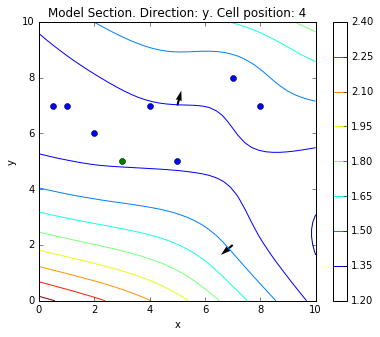

In [4]:
par2 = 1/(7.5**2)
w = 1/7.5
test.potential_field = test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref,
par2, w)[0].reshape(40,10,40)
test.potential_field = np.swapaxes(test.potential_field,0,1)

test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float32")
test.calculate_gradient()
test.plot_potential_field_2D(direction="y", cell_pos = 4, figsize = (6.2,5), colorbar = True)

# Plotting development

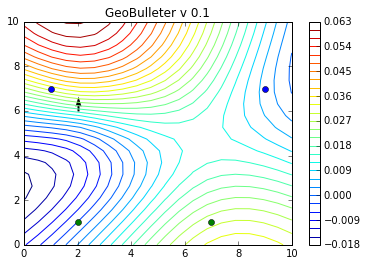

In [30]:
plot_this_crap("y")

In [121]:
"""Export model to VTK

Export the geology blocks to VTK for visualisation of the entire 3-D model in an
external VTK viewer, e.g. Paraview.

..Note:: Requires pyevtk, available for free on: https://github.com/firedrakeproject/firedrake/tree/master/python/evtk

**Optional keywords**:
    - *vtk_filename* = string : filename of VTK file (default: output_name)
    - *data* = np.array : data array to export to VKT (default: entire block model)
"""
vtk_filename = "noddyFunct2"

extent_x = 10
extent_y = 10
extent_z = 10

delx = 0.2
dely = 0.2
delz = 0.2
from pyevtk.hl import gridToVTK
# Coordinates
x = np.arange(0, extent_x + 0.1*delx, delx, dtype='float64')
y = np.arange(0, extent_y + 0.1*dely, dely, dtype='float64')
z = np.arange(0, extent_z + 0.1*delz, delz, dtype='float64')

# self.block = np.swapaxes(self.block, 0, 2)


gridToVTK(vtk_filename, x, y, z, cellData = {"geology" : sol})

ImportError: No module named 'pyevtk'

In [23]:
sys.path.append("/home/bl3/anaconda3/lib/python3.5/site-packages/PyEVTK-1.0.0-py3.5.egg_FILES/pyevtk")
nx = 50
ny = 50
nz = 50

xmin = 1
ymin = 1
zmin = 1
grid =  sol
var_name = "Geology"
#from evtk.hl import gridToVTK
import pyevtk
from pyevtk.hl import gridToVTK

# define coordinates
x = np.zeros(nx + 1)
y = np.zeros(ny + 1)
z = np.zeros(nz + 1)
x[1:] = np.cumsum(delx)
y[1:] = np.cumsum(dely)
z[1:] = np.cumsum(delz)



# plot in coordinates
x += xmin
y += ymin
z += zmin

print (len(x), x)
gridToVTK("GeoMigueller", x, y, z,
          cellData = {var_name: grid})

51 [ 1.   1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2
  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2]


'/home/bl3/PycharmProjects/GeMpy/GeoMigueller.vtr'

# Performance
## CPU

In [6]:
%%timeit
test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref,
par2, w);

100 loops, best of 3: 6.41 ms per loop


In [7]:
test.interpolate.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeMpy/GeoMig.py:477
  Time in 412 calls to Function.__call__: 2.742617e+00s
  Time in Function.fn.__call__: 2.696156e+00s (98.306%)
  Time in thunks: 2.541325e+00s (92.661%)
  Total compile time: 1.843985e+01s
    Number of Apply nodes: 254
    Theano Optimizer time: 2.322626e+00s
       Theano validate time: 1.088021e-01s
    Theano Linker time (includes C, CUDA code generation/compiling): 1.604251e+01s
       Import time 1.168010e-01s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 61.358s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  68.9%    68.9%       1.751s       6.25e-05s     C    28016      68   theano.tensor.elemwise.Elemwise
  11.1%    80.0%       0.282s       6.85e-05s     C     4120      10   theano.tensor.blas.Dot22Scalar
   9.7%    89.7%       0.246s       5.43e-05s     C     4532      11   theano.tensor.basic.Alloc
   4.9%    94.6% 

## GPU

In [54]:
%%timeit
test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref,
par2, w);

100 loops, best of 3: 8.83 ms per loop


In [55]:
test.interpolate.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeMpy/GeoMig.py:477
  Time in 412 calls to Function.__call__: 3.664509e+00s
  Time in Function.fn.__call__: 3.621449e+00s (98.825%)
  Time in thunks: 3.093245e+00s (84.411%)
  Total compile time: 2.934427e+00s
    Number of Apply nodes: 291
    Theano Optimizer time: 2.653788e+00s
       Theano validate time: 2.586505e-01s
    Theano Linker time (includes C, CUDA code generation/compiling): 1.999319e-01s
       Import time 0.000000e+00s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 1682.560s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  51.1%    51.1%       1.582s       1.07e-04s     C    14832      36   theano.tensor.elemwise.Elemwise
   9.2%    60.3%       0.284s       6.89e-05s     C     4120      10   theano.sandbox.cuda.basic_ops.GpuAlloc
   8.9%    69.2%       0.275s       3.71e-05s     C     7416      18   theano.sandbox.cuda.basic_ops.Hos